In [1]:
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import sys
sys.path.append('../python/lib/')

In [4]:
import matplotlib.pyplot as plt
#%plt.rcParams['figure.figsize'] = [8, 8]

# Plot Colormaps

In [5]:
eminus_data = np.load('eminus_Ele-Eta0-PhiPiOver2-Energy50_28x28.npy')
synthetic_data = np.load('synthetic_eminus_Energy50_SimpleNetwork_4x512.npy')

In [6]:
print(eminus_data.shape)
print(synthetic_data.shape)

(21000, 28, 28)
(21025, 28, 28)


In [7]:
eminus_mean_signal = np.mean(eminus_data, axis=0)
synthetic_mean_signal = np.mean(synthetic_data, axis=0)

In [8]:
eminus_mean_signal.shape

(28, 28)

In [9]:
# importing generate function from lib util 
from util import generate
from util import sum_energy
from util import mean_eta

In [10]:
# importing plot_hist function from histograms
from histograms import plot_hist
from histograms import plot_energy_hist
from histograms import plot_cumulative

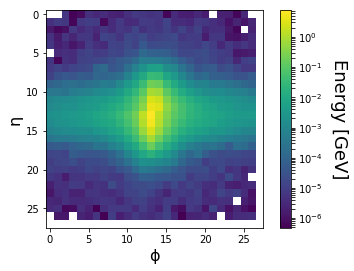

In [11]:
fig=plot_hist(eminus_mean_signal)

In [12]:
fig.savefig("originalCaloImage.pdf")

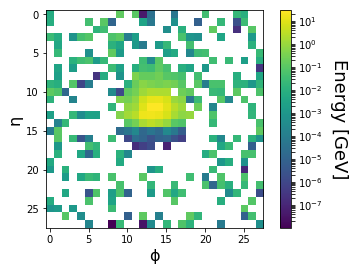

In [13]:
fig = plot_hist(synthetic_mean_signal)

In [14]:
fig.savefig("syntheticCaloImage.pdf",bbox_inches = 'tight')

In [15]:
eminus_data_sum = sum_energy(eminus_data)
synthetic_data_sum = sum_energy(synthetic_data)

In [16]:
eminus_data_sum.shape

(21000,)

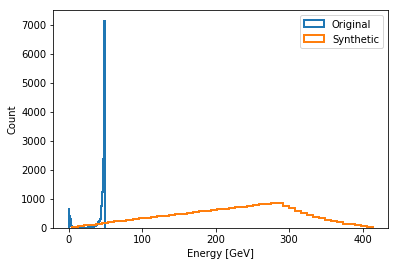

In [17]:
plot_energy_hist(data=(eminus_data_sum,synthetic_data_sum),bins=50,
                 filename = "synt_energy_histo.pdf",xlabel="Energy [GeV]", ylabel="Count", 
                 legend=("Original", "Synthetic"))


# Plot $\eta$ and $\phi$ components

In [18]:
from histograms import plot_cumulative

In [19]:
from util import mean_eta, mean_phi

In [20]:
eminus_eta_mean = mean_eta(eminus_data)
synthetic_eta_mean = mean_eta(synthetic_data)
eminus_phi_mean = mean_phi(eminus_data)
synthetic_phi_mean = mean_phi(synthetic_data)

In [21]:
def normalize_array(array):
    integral = np.sum(array)
    norm_array = array/integral
    return norm_array

In [22]:
synthetic_eta_mean.shape

(28,)

In [23]:
eminus_eta_mean_norm = normalize_array(eminus_eta_mean)
synthetic_eta_mean_norm = normalize_array(synthetic_eta_mean)
eminus_phi_mean_norm = normalize_array(eminus_phi_mean)
synthetic_phi_mean_norm = normalize_array(synthetic_phi_mean)

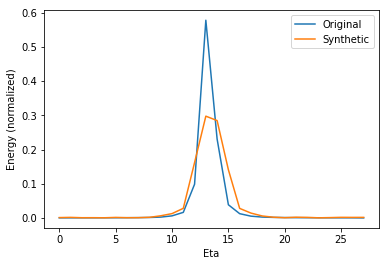

In [24]:
plot_cumulative(data=(eminus_eta_mean_norm,synthetic_eta_mean_norm), 
                ylabel="Energy (normalized)", xlabel="Eta",legend=("Original","Synthetic"))

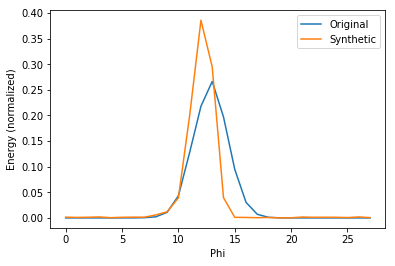

In [25]:
plot_cumulative(data=(eminus_phi_mean_norm,synthetic_phi_mean_norm), 
                ylabel="Energy (normalized)", xlabel="Phi",legend=("Original","Synthetic"))